# TIME SERIES

### Table of content

A. Understanding data.
    1. Hypothesis Generation.
    2. Getting the system ready and loading the data.
    3. Dataset Structure and Content.
    4. Feature Extraction.
    5. Exploratory Analysis.


B. Forecasting using Multiple Modeling Techniques.
    1. Splitting the data into training and validation part.
    2. Modeling Techniques.
        a. Naive Approach.
        b. Moving Average.
        c. Simple Exponential Smoothing.
        d. Holt's linear Trend Model on daily time series.
        e. Holt Winter's Model on daily time series.
    3. ARIMA Model.
        a. Introduction to ARIMA Model.
        b. Parameter tuning for ARIMA Model.
    4. SARIMAX Model on daily time series.
        

#### PROBLEM STATEMENT

Help out Unicorn Investors. They are considering making an investment in a new form of transportation - JetRail. 
JetRail uses Jet propulsion technology to run rails and move people at a high speed! While JetRail has mastered the technology and they hold the patent for their product, the investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months.
 
You need to help Unicorn ventures with the decision. They usually invest in B2C start-ups less than 4 years old looking for pre-series A funding. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

Evaluation Metric:

Root Mean Squre Error (RMSE) is the evaluation metric for this contest



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline 
import warnings

In [2]:
train=pd.read_csv("Train_SU63ISt.csv")
test=pd.read_csv("Test_0qrQsBZ.csv")

In [3]:
train_original=train.copy()
test_original=test.copy()

In [4]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [5]:
test.columns
# We don't have "Count" column because we have to predict it in our test dataset.

Index(['ID', 'Datetime'], dtype='object')

### FEATURES

ID is the unique number given to each observation point.

Datetime is the time of each observation.

Count is the passenger count corresponding to each datetime.


In [6]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [7]:
test.dtypes

ID           int64
Datetime    object
dtype: object

In [8]:
train.shape

(18288, 3)

In [9]:
test.shape

(5112, 2)

## Feature Extraction

"Datetime" is in object data type. We transform it into a datetime type.

In [10]:
train['Datetime']= pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test['Datetime']= pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
train_original['Datetime']= pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test_original['Datetime']= pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')

Extract time and date from "Datetime". Creating new columns for Year, Month, Day and Hour

In [11]:
for i in (train, test_original, test, train_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['hour']=i.Datetime.dt.hour

From Day column, obtain "Day of the week" and determine if it is weekday or weekend.

In [12]:
train['day of week']=train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [13]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [14]:
temp2 = train["Datetime"].apply(applyer)
train["weekend"]=temp2

Index the Datetime to get the time period on the x-axis

In [15]:
train.index=train["Datetime"]

Select data to show

In [16]:
df=train.drop("ID",1)
ts=df["Count"]

Plot the Time Series

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


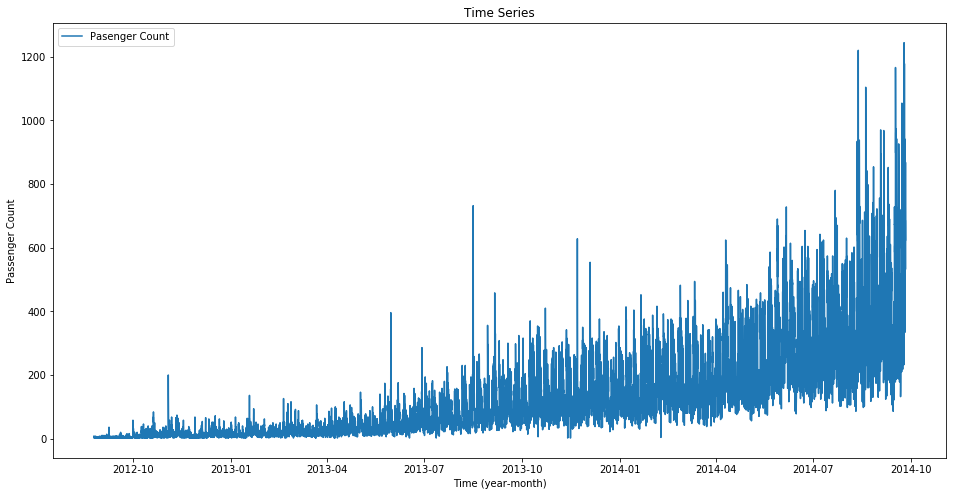

In [17]:
plt.figure(figsize=(16,8))
plt.plot(ts, label="Pasenger Count")
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("Passenger Count")
plt.legend(loc="best");


#### HYPOTHESIS:
- Traffic will increase as the years pass by.
- Traffic will be high from May to October.
- Traffic on weekdays will be more than on weekends.
- Traffic during peak hours will be high.

## Exploratory Analysis

1) Verify if Traffic will increase as the years pass by.

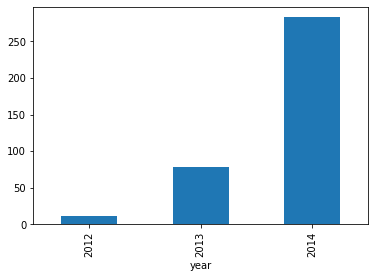

In [18]:
train.groupby('year')['Count'].mean().plot.bar();

2) Verify if Traffic will be high from May to October.

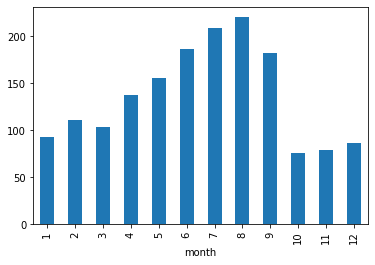

In [19]:
train.groupby('month')['Count'].mean().plot.bar();

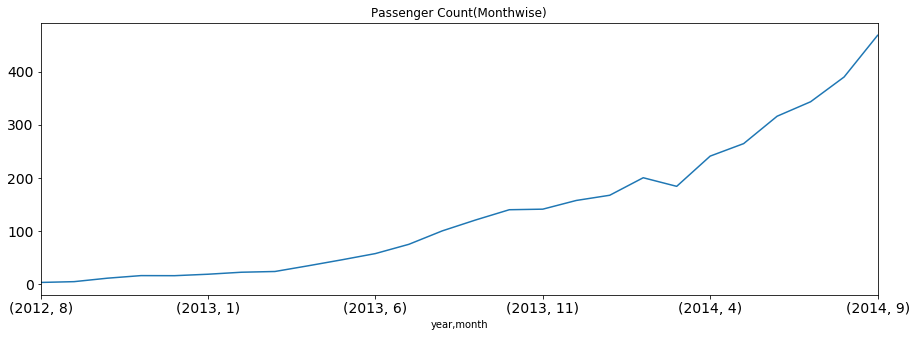

In [20]:
temp=train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(15,5),
          title='Passenger Count(Monthwise)',
          fontsize=14);

Daily mean of Passenger Count

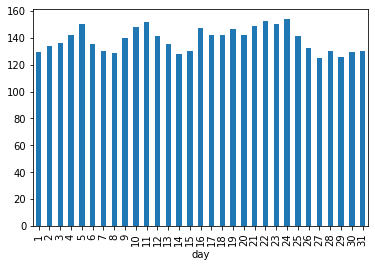

In [21]:
train.groupby("day")["Count"].mean().plot.bar();

3) Verify if Traffic on weekdays will be more than on weekends.

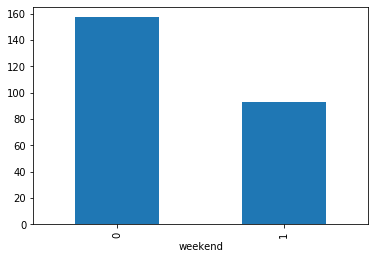

In [22]:
train.groupby("weekend")["Count"].mean().plot.bar();

3) Verify if Traffic during peak hours will be high.

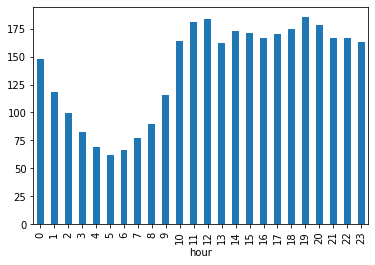

In [23]:
train.groupby("hour")["Count"].mean().plot.bar();

Daywise Passenger Count

NOTE: 0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.

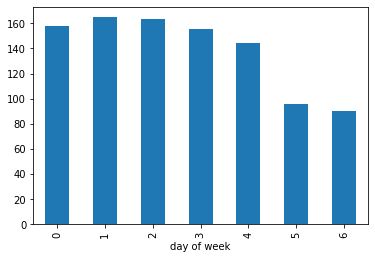

In [24]:
train.groupby("day of week")["Count"].mean().plot.bar();

#### Reduce noise in the hourly time series by aggregating the hourly time series to daily, weekly and monthly time series.

##### Resample time-series data.

Convenience method for frequency conversion and resampling of time series. Object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or pass datetime-like values to the on or level keyword.



In [25]:
train.Timestamp=pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index=train.Timestamp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [26]:
#Hourly Time Series
hourly=train.resample("H").mean()

In [27]:
#Converting to daily mean
daily=train.resample("D").mean()

In [28]:
#Converting to week mean
weekly=train.resample("W").mean()

In [29]:
#Converting to monthly mean
monthly=train.resample("M").mean()

Plot hourly, daily, weekly and monthly time series.

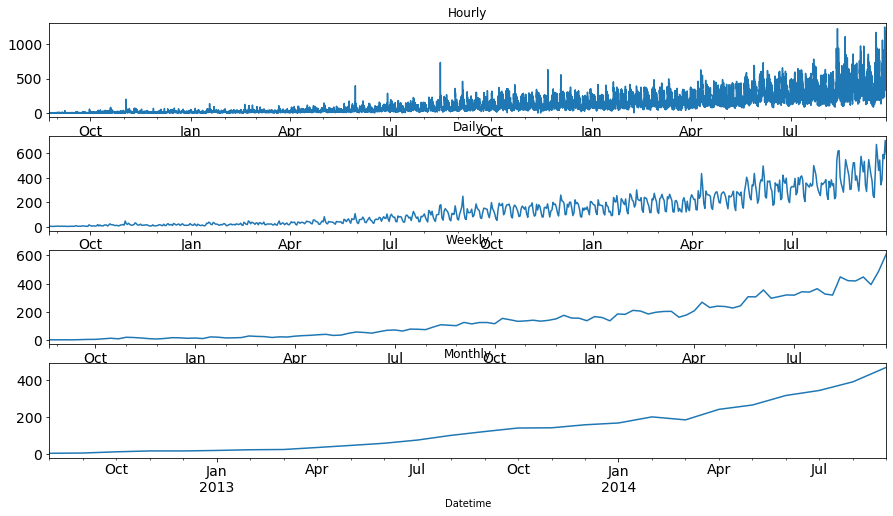

In [30]:
fig, axs= plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title='Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title='Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title='Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title='Monthly', fontsize=14, ax=axs[3]);

We will work on daily time series.

In [31]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp
test=test.resample('D').mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [32]:
train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp
train=train.resample('D').mean()

## Splitting the data into training and validation

To divide the data into training and validation set, we will take last 3 months as the validation data and rest for training data. We will only take 3 months as the trend will be the most in them. If we take more than 3 months foe the validation set, our training set will have less data points as the duration is of 25 months. So, it will be a good choice to take 3 months for validation set.

The starting date of the dataset is 25-08-2012 and the end date is 25-09-2014.

In [33]:
Train=train.loc['2012-08-25':'2014-06-24']
valid=train.loc['2014-06-25':'2014-09-25']

Plot Train and Validation sets

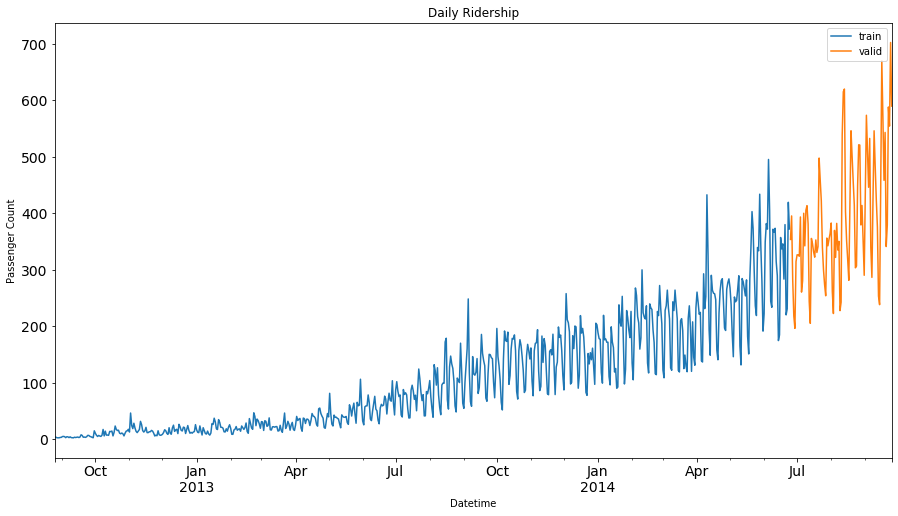

In [34]:
Train.Count.plot(figsize=(15,8), title='Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title='Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger Count")
plt.legend(loc="best")
plt.show()

## Modeling Techniques

##### 1) NAIVE APPROACH

We expect that the next expected point is equal to the last obervation.

We need to:
 - Create an array with the Train length.
 - Create a copy of the Validation dataset, so as to obtain the Datetime od observations.
 - Create a new column with the last Count value of the Train dataset.

In [35]:
dd=np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]

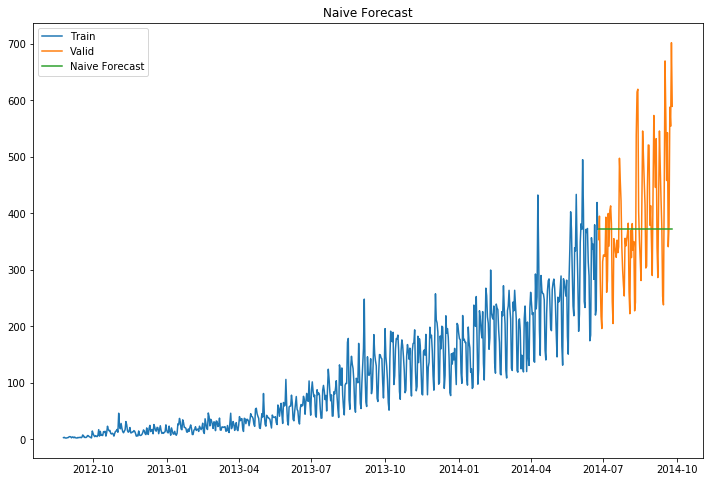

In [36]:
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index, valid['Count'], label='Valid')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

We can calculate RMSE (Root Mean Square Error) to check the accuracy of our model on validation data set:

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [38]:
rms=sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

111.79050467496724


   We can infer that this method is not suitable for datasets with high variability.

##### 2) Moving Average (Rolling mean)

Predictions are made on the basis of the average of last few points

We will take the average of the passenger counts for the last 10, 20 and 50 days and visualize the results.


In [39]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast_10'] = Train['Count'].rolling(10).mean().iloc[-1] #Average of last 10 observations.

In [40]:
y_hat_avg['moving_avg_forecast_20'] = Train['Count'].rolling(20).mean().iloc[-1] #Average of last 20 observations.

In [41]:
y_hat_avg['moving_avg_forecast_50'] = Train['Count'].rolling(50).mean().iloc[-1] #Average of last 50 observations.

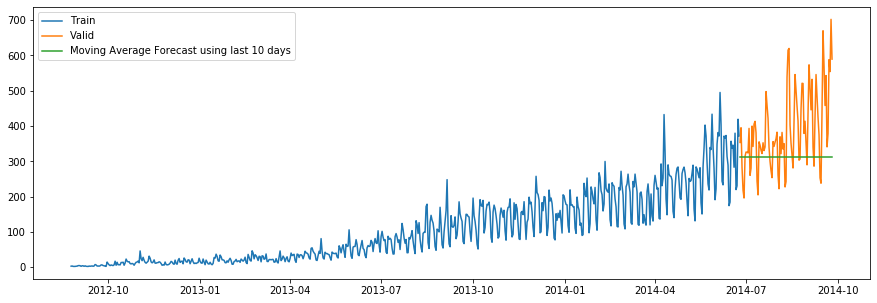

In [42]:
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast_10'], label='Moving Average Forecast using last 10 days')
plt.legend(loc='best')
plt.show()

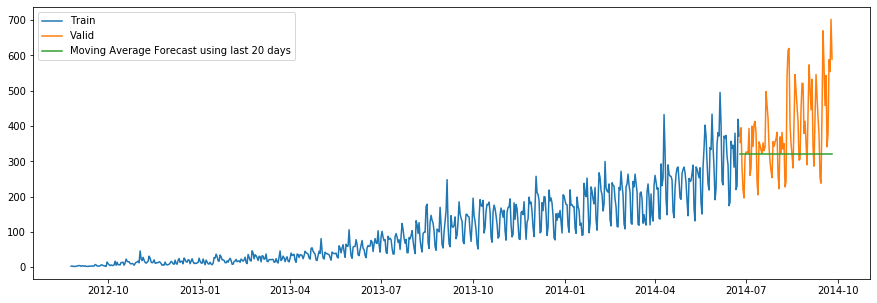

In [43]:
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast_20'], label='Moving Average Forecast using last 20 days')
plt.legend(loc='best')
plt.show()

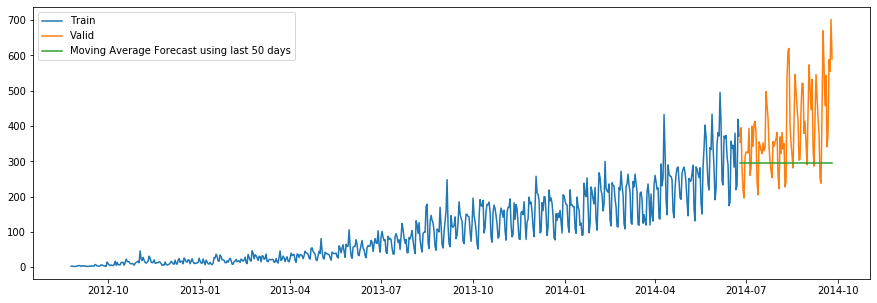

In [44]:
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast_50'], label='Moving Average Forecast using last 50 days')
plt.legend(loc='best')
plt.show()

We can calculate RMSE (Root Mean Square Error) to check the accuracy of our model on validation data set:

In [45]:
rms_10=sqrt(mean_squared_error(valid.Count, y_hat_avg['moving_avg_forecast_10']))
rms_20=sqrt(mean_squared_error(valid.Count, y_hat_avg['moving_avg_forecast_20']))
rms_50=sqrt(mean_squared_error(valid.Count, y_hat_avg['moving_avg_forecast_50']))
print('The RMSE for moving average for last 10 days is ' + str(rms_10))
print('The RMSE for moving average for last 20 days is ' + str(rms_20))
print('The RMSE for moving average for last 50 days is ' + str(rms_50))

The RMSE for moving average for last 10 days is 134.23733308950264
The RMSE for moving average for last 20 days is 130.44984977550422
The RMSE for moving average for last 50 days is 144.19175679986802


We can see that predictions are getting weaker as we increase the number of observations

##### 3) SIMPLE EXPONENTIAL SMOOTHING  (SES)

SES is a good choice for forecasting data with no clear trend or seasonal pattern.

- We asign larger weights to more recent observations than to observations from the distant past.
- Weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.

In [46]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [47]:
y_hat_avg = valid.copy()

# SES has a smoothing parameter that goes from 0≤ α ≤1.
# α=0: the forecasts of all future values are equal to the average (or “mean”) of the historical data (AKA: Average method).
# α=1: simply set all forecasts to be the value of the last observation (AKA: Naive method in statistics).
# auto optimization that allow statsmodels to automatically find an optimized value for us


# We create the model object and train it. 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6, optimized=False)

In [48]:
# We run a forecast with as many observations as the valid dataset length. And save it in a new column.

y_hat_avg['SES'] = fit2.forecast(len(valid))

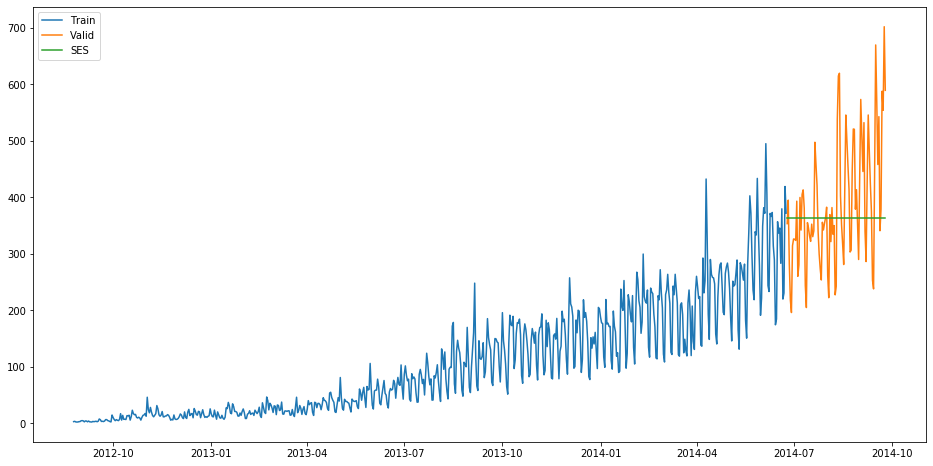

In [49]:
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

##### 4) HOLT'S LINEAR TREND MODEL 
 
Holt’s method involves a forecast equation and two smoothing equations (one for the level and one for the trend):
- Where 0≤ α ≤1 is the level smoothing parameter, and 0≤ β* ≤1 is the trend smoothing parameter.
- For long-term forecast, forecasting with Holt’s method will increase or decrease indefinitely into the future. 
- In this case, we use the Damped trend method which has a damping parameter 0< ϕ <1 to prevent the forecast “go wild”.

First, we can decompose the time series in four parts:
- OBSERVED: which is the original time series.
- TREND: which shows the trend in the time series, i.e., increasing or decreasing behavour of time series.
- SEASONAL: which tells us about the seasonality.
- RESIDUAL: which is obtained by removing any trend or seasonality

In [50]:
import statsmodels.api as sm

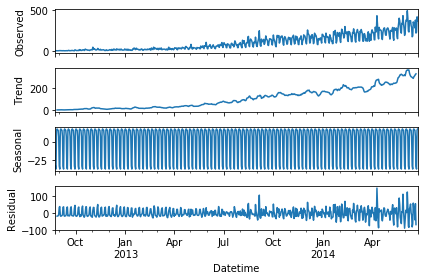

In [51]:
sm.tsa.seasonal_decompose(Train.Count).plot()
result=sm.tsa.stattools.adfuller(Train.Count)
plt.show()

An increasing trend can be seen in the dataset, so now we will make a model on the trend.

In [52]:
y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_hat_avg['Holt_linear']=fit1.forecast(len(valid))

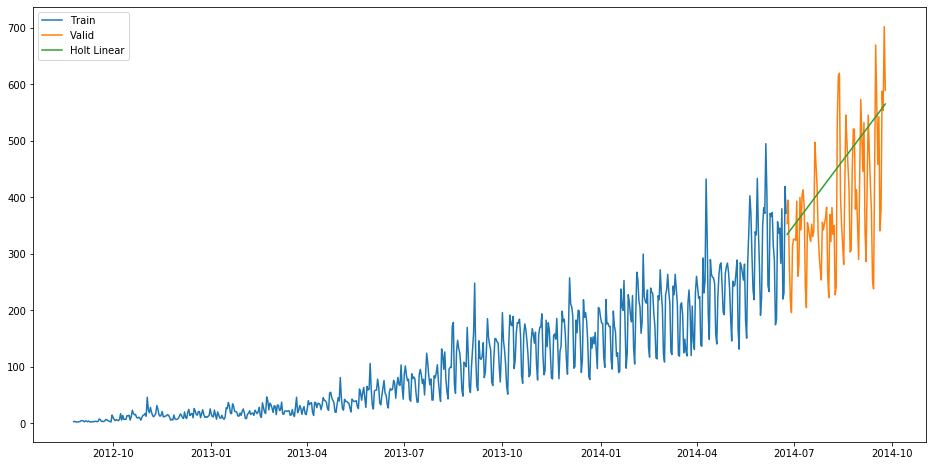

In [53]:
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt Linear')
plt.legend(loc='best')
plt.show()

We can calculate RMSE (Root Mean Square Error) to check the accuracy of our model on validation data set:

In [54]:
rms=sqrt(mean_squared_error(valid.Count, y_hat_avg['Holt_linear']))
rms

112.94278345314041

###### a) HOLT'S LINEAR TREND MODEL on daily time series
 
We will make predictions base on the daily time series and then will distribute that daily prediction to hourly predictions.
We have fitted the Holt's linear trend model on the train dataset and validated it using validation dataset

In [55]:
# Load submission file.

submission=pd.read_csv("sample_submission_LSeus50.csv")

In [56]:
# We only need ID and corresponding Count for the final Submission.
# Let's make prediction for the test dataset

predict=fit1.forecast(len(test))

In [57]:
# Let's save this predictions in test file in a new column.

test['prediction']=predict

Remember this is the daily predictions. We have to convert this predictions to hourly basis. 

- To do so we will:

1) Calculate the ratio of passenger count for every hour of every day. 

2) Find the average ratio of passenger count for every hour and we will get 24 ratios.

3) To calculate the hourly predictions we will multiply the daily prediction with the hourly ratio.

In [58]:
# Calculating the hourly ratio of count

train_original['ratio']=train_original['Count']/train_original['Count'].sum()

In [59]:
# Grouping the hourly ratio

temp=train_original.groupby(['hour'])['ratio'].sum()

In [60]:
# Group to CSV format

pd.DataFrame(temp, columns=['hour','ratio']).to_csv('Groupby.csv')

In [61]:
temp2=pd.read_csv('Groupby.csv')
temp2=temp2.drop('hour.1',1)

In [62]:
# Merge Test and test_original on day, month, year.
merge=pd.merge(test, test_original, on=('day', 'month', 'year'), how='left')
merge['hour']=merge['hour_y']
merge=merge.drop(['year', 'month','Datetime','hour_x','hour_y'], axis=1)

In [63]:
# Predicting by merging Merge and Temp2

prediction=pd.merge(merge, temp2, on='hour', how='left')

In [64]:
# Converting the ratio to the original scale 

prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

In [65]:
# Let's drop al other features from the submission file and keep ID and Count only.

submission=prediction.drop(['ID_x', 'day', 'ID_y', 'prediction', 'hour', 'ratio'], axis=1)

In [66]:
# Converting the final submission to csv format

pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

###### b) HOLT WINTER's MODEL on daily time series
 
This model applies exponential smoothing to the seasonal components in addition to level and trend.

In [67]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']), seasonal_periods=7, trend='add', seasonal='add').fit()
y_hat_avg['Holt_Winter']=fit1.forecast(len(valid))

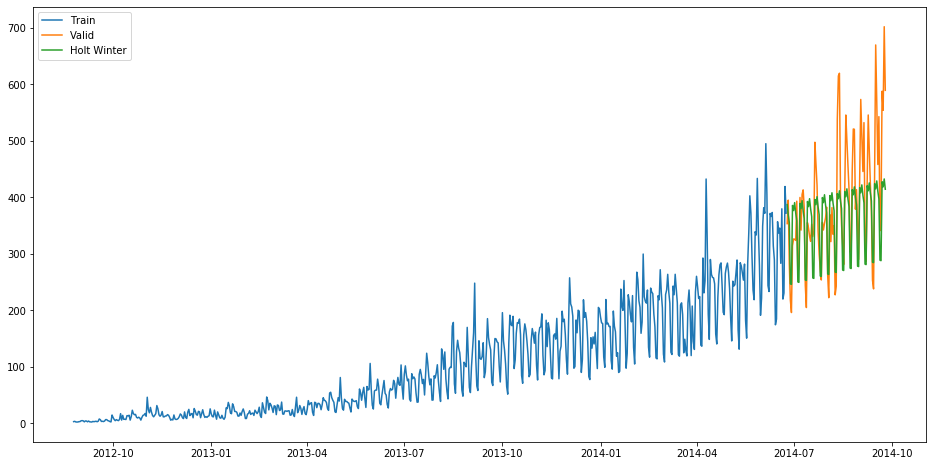

In [68]:
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt Winter')
plt.legend(loc='best')
plt.show()

In [69]:
rms=sqrt(mean_squared_error(valid.Count, y_hat_avg['Holt_Winter']))
rms

82.38041226792582

We can see that the RMSE value has reduced a lot from this method. Let's forecast the Counts for the entire length of the Test dataset.

In [70]:
predict=fit1.forecast(len(test))

Now we will convert these daily passenger count into hourly passenger count using the same approach which we followed above.

1) Calculate the ratio of passenger count for every hour of every day.

2) Find the average ratio of passenger count for every hour and we will get 24 ratios.

3) To calculate the hourly predictions we will multiply the daily prediction with the hourly ratio.

In [71]:
# Let's save this predictions in test file in a new column.

test['prediction']=predict

In [72]:
# Merge Test and test_original on day, month, year.
merge=pd.merge(test, test_original, on=('day', 'month', 'year'), how='left')
merge['hour']=merge['hour_y']
merge=merge.drop(['year', 'month','Datetime','hour_x','hour_y'], axis=1)


In [73]:
# Predicting by merging Merge and Temp2

prediction=pd.merge(merge, temp2, on='hour', how='left')

In [74]:
# Converting the ratio to the original scale 

prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

In [75]:
# Let's drop al other features from the submission file and keep ID and Count only.

submission=prediction.drop(['ID_x', 'day', 'ID_y', 'prediction', 'hour', 'ratio'], axis=1)

In [76]:
# Converting the final submission to csv format

pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt Winter.csv')

##### 4) ARIMA: Auto Regression Integrated Moving Average

It is specified by ordered parameters:
- p=Order of the autoregressive model (number of time lags)
- d=Degree of differencing (number of times the data have had past values substracted)
- q=Order of Moving average model.

We need to work with STATIONERY SERIES. For so, we need to remove the trend and seasonality from data.

STATIONERY TIME SERIES
- The mean of the time series should not be a function of time. Should be constant.
- The variance of the time series should not bes a function of time.
- The co-variance of the ITH term and the (i+m)TH term should not be a function of time.


Parameter tuning for ARIMA MODEL:

We use Dickey Fuller test to check the stationarity of the series.
The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the "Test Statistic" is less than the "Critical Value", we can reject the null hypothesis and say that the series is Stationary.

In [77]:
from statsmodels.tsa.stattools import adfuller

In [78]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    
    rolmean = pd.Series(timeseries).rolling(window=24).mean() #24 hours on each day.
    rolstd = pd.Series(timeseries).rolling(window=24).std()
    
   
    
    #Plot rolling statistics:
    
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller Test:
    
    print('Results of Dickey-Fuller Test: ')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)       
    

In [79]:
from matplotlib.pylab import rcParams

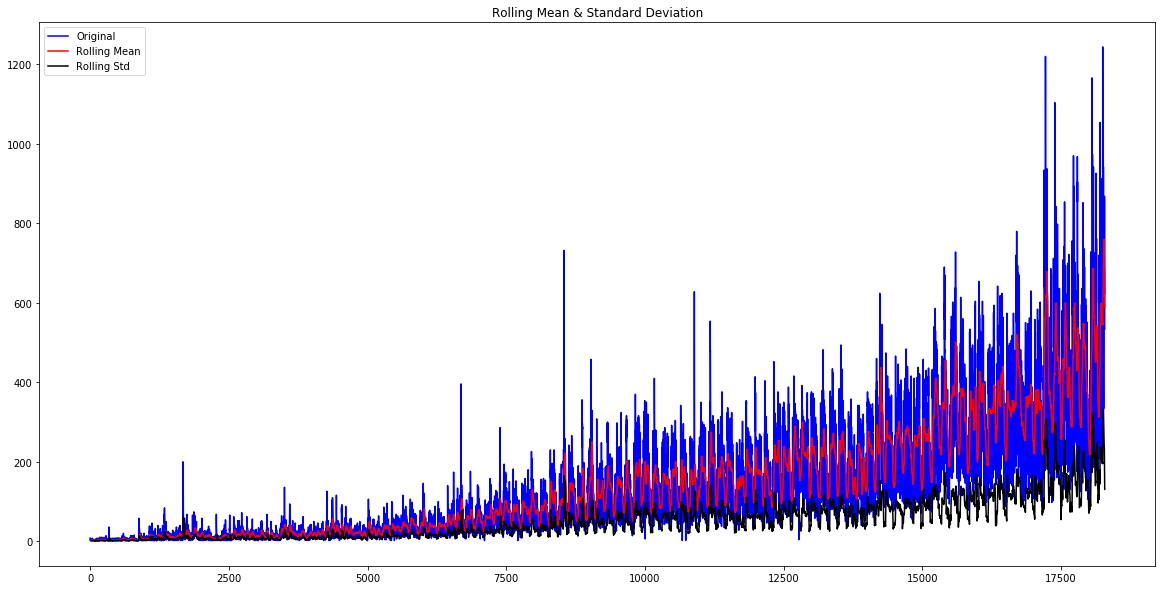

Results of Dickey-Fuller Test: 
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [80]:
rcParams['figure.figsize'] = 20,10
test_stationarity(train_original['Count'])

The statistics show that the Time Series is stationary as TEST STATISTICS < CRITICAL VALUE but we can see an increasing trend in the data. So first, we will try to make the data more stationary, we need to remove the trend and seasonality.

###### a) Removing Trend 
 
- A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear.

- We can see an increasing in the data so we can apply transformations that penalizes higher values more than smaller ones, for example a log transformation.

- We will take rolling average here to remove the trend. We will take the window size of 24 based on the fact that each day has 24hs.

In [81]:
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])    

In [82]:
moving_avg = pd.Series(Train_log).rolling(window=24).mean()

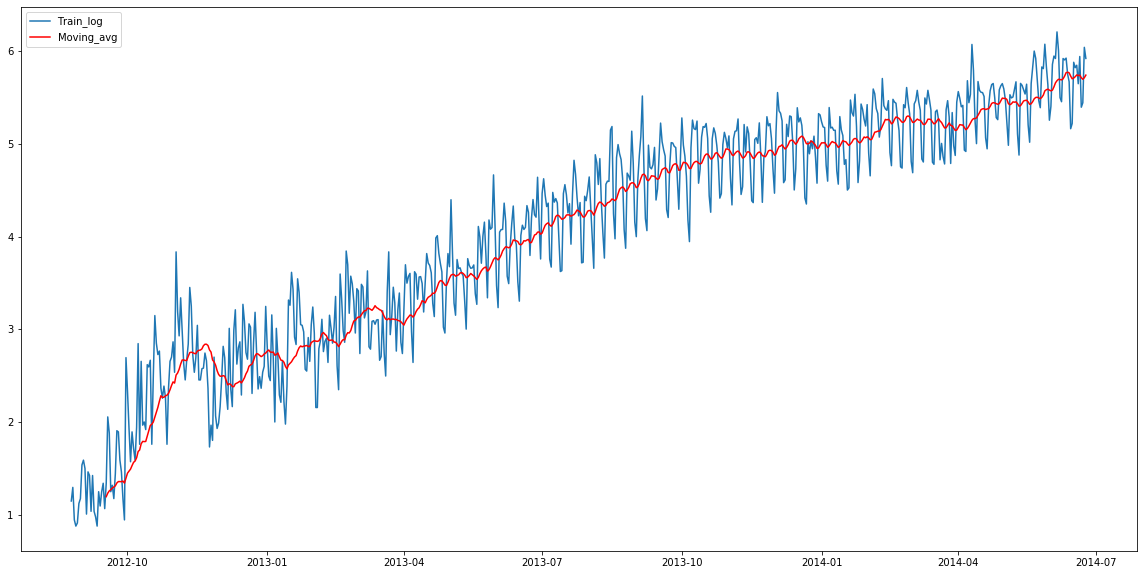

In [83]:
plt.plot(Train_log, label='Train_log')
plt.plot(moving_avg, color='red', label='Moving_avg')
plt.legend(loc='best')
plt.show()

So we can observe an increasing trend. Now we will remove this increasing trend to make our time series stationary.

In [84]:
train_log_moving_avg_diff = Train_log - moving_avg

Since we took the average of 24 values, rolling mean is not defined for the first 23 values. So let's drop those null values.

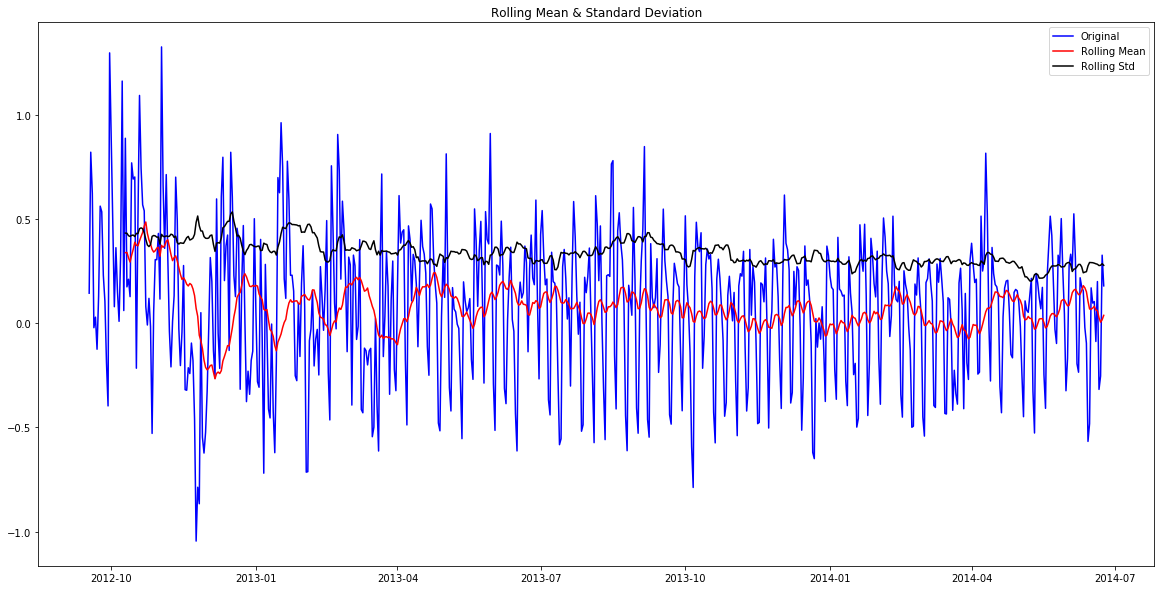

Results of Dickey-Fuller Test: 
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [85]:
train_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(train_log_moving_avg_diff)

We can see now that TEST STATISTICS is much smaller than CRITICAL VALUE. So, we can be confident that the trend is almost removed. 

Let's now stabilize the mean of the time series which is also a requirement for stationary time series.

- Diferencing can help to make the series stable and eliminate the trend. 

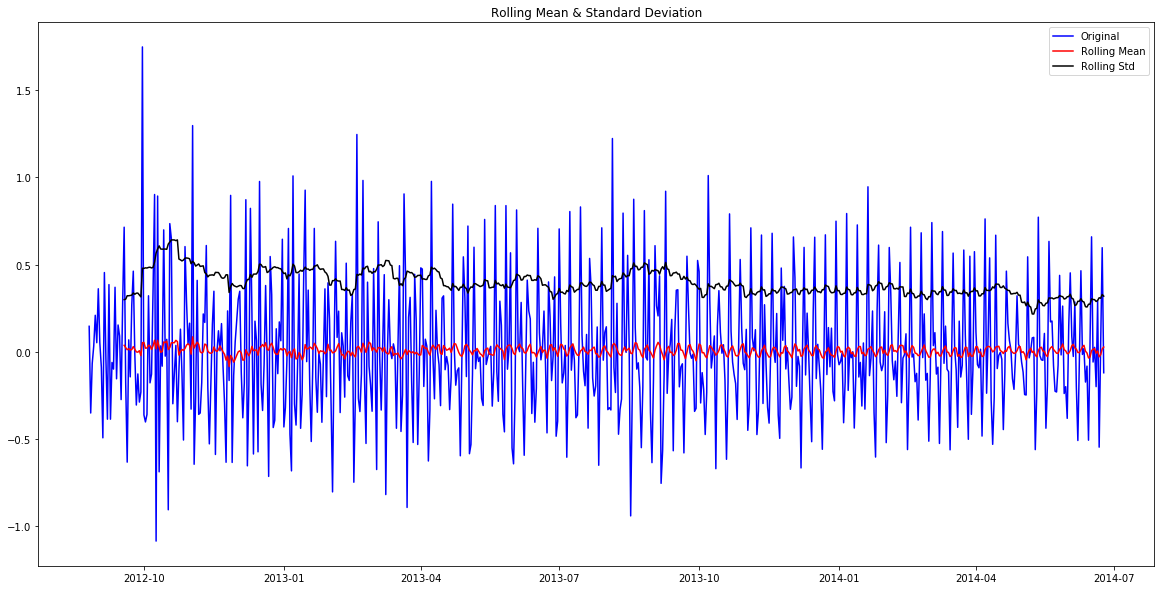

Results of Dickey-Fuller Test: 
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [86]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

Now we will decompose the time series into trend and seasonality and will get the residual which is the random variation in the series.

###### b) Removing Seasonality 
 
- By Seasonality, we mean periodic fluctuations. A seasonal pattern exists when a series is influenced by seasonal factors.

- Seasonality is always of a fixed and known period.

- We will use seasonal decompose to decompose the time series into trend, seasonality and residuals.

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [88]:
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq=24)

In [89]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

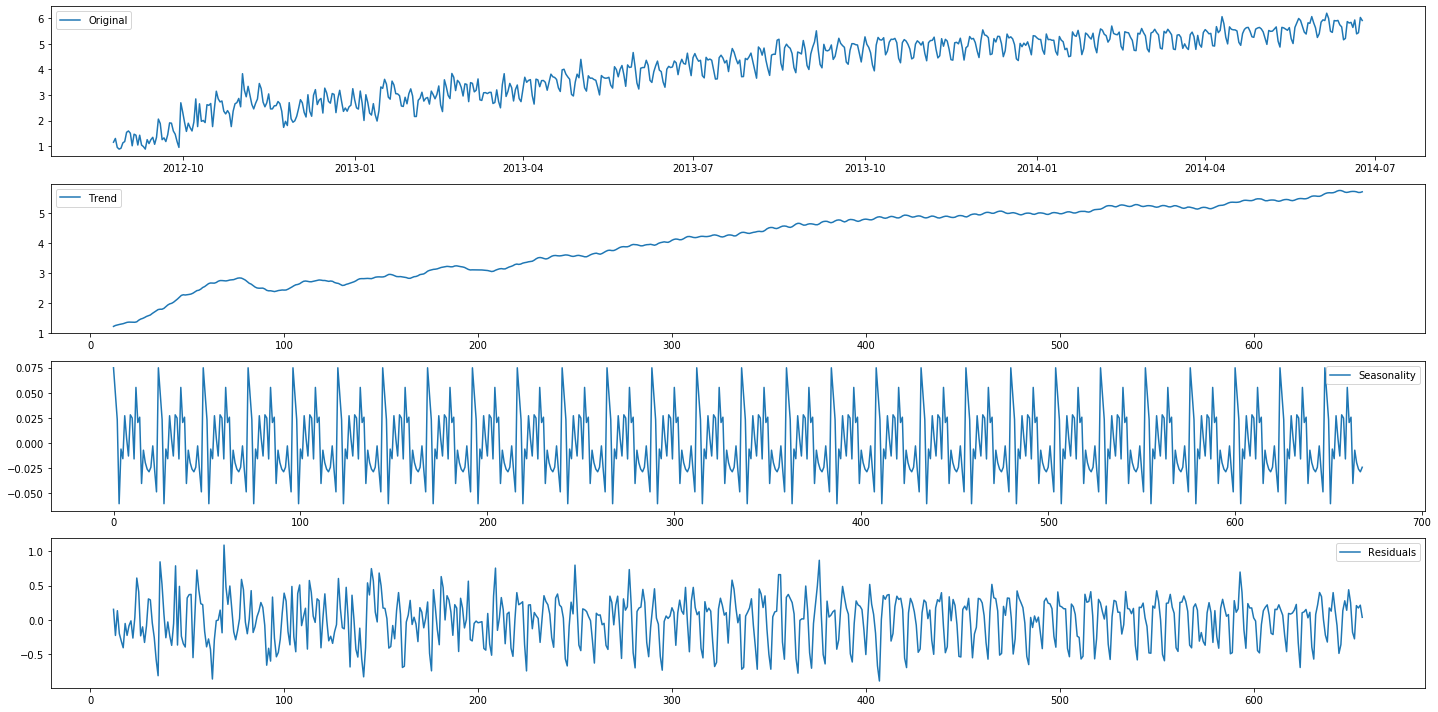

In [90]:
plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.legend(loc='best')
plt.tight_layout()
plt.show()


We can see the trend and the seasonality clearly in the above graph. Seasonality shows a constant trend in counter. 

Let's check stationarity of residuals

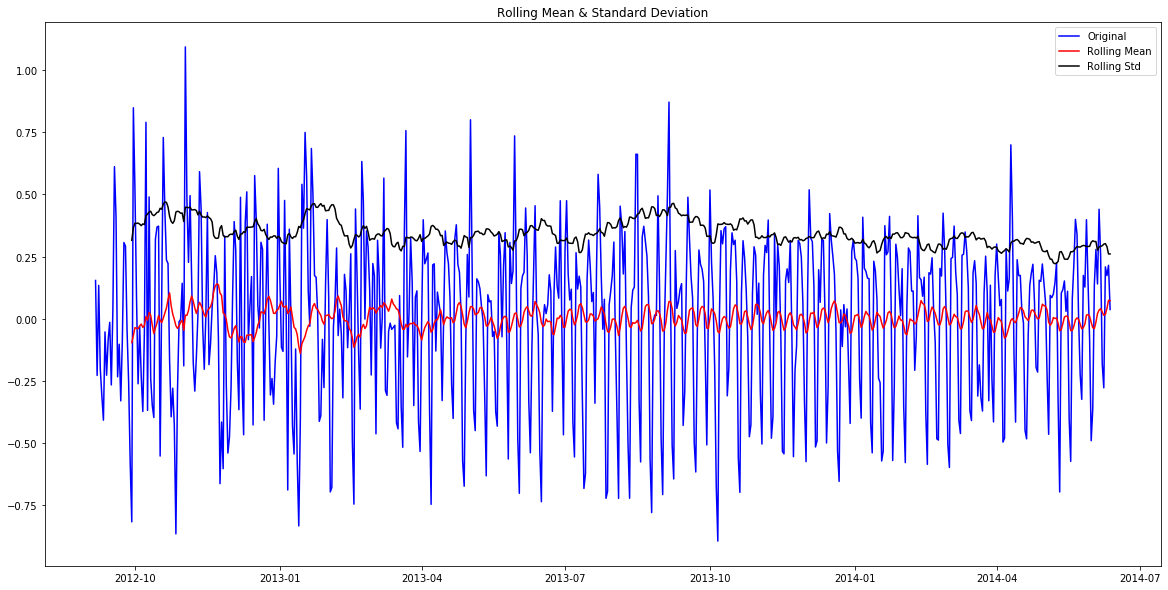

Results of Dickey-Fuller Test: 
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [91]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace=True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])

- It can be interpreted from the results that the residuals are stationary.

## Forecasting the time series using ARIMA

1) Fit the ARIMA model to our time series to find the optimized values for p, q, d parameters.
2) To find optimized values we will use ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) graph.

- ACF is a measure of the correlation between the Time Series with a lagged version of itself.
- PACF measures the correlation between the TimeSeries with a lagged version of itself but after eliminating the variations already  explained by the intervening comparisons.

In [92]:
from statsmodels.tsa.stattools import acf, pacf

In [93]:
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


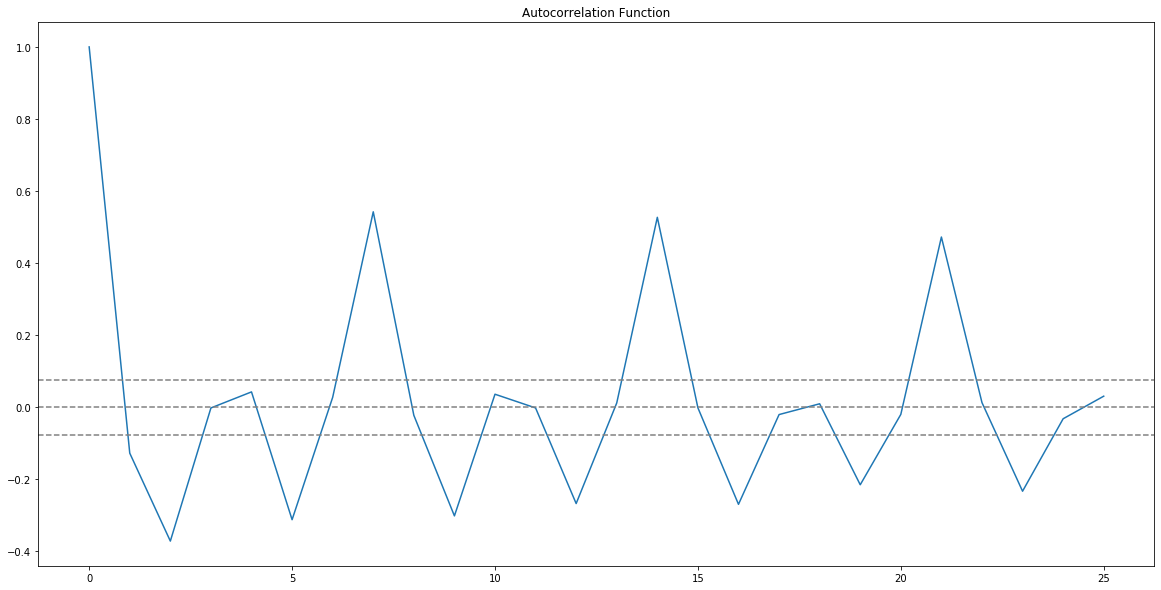

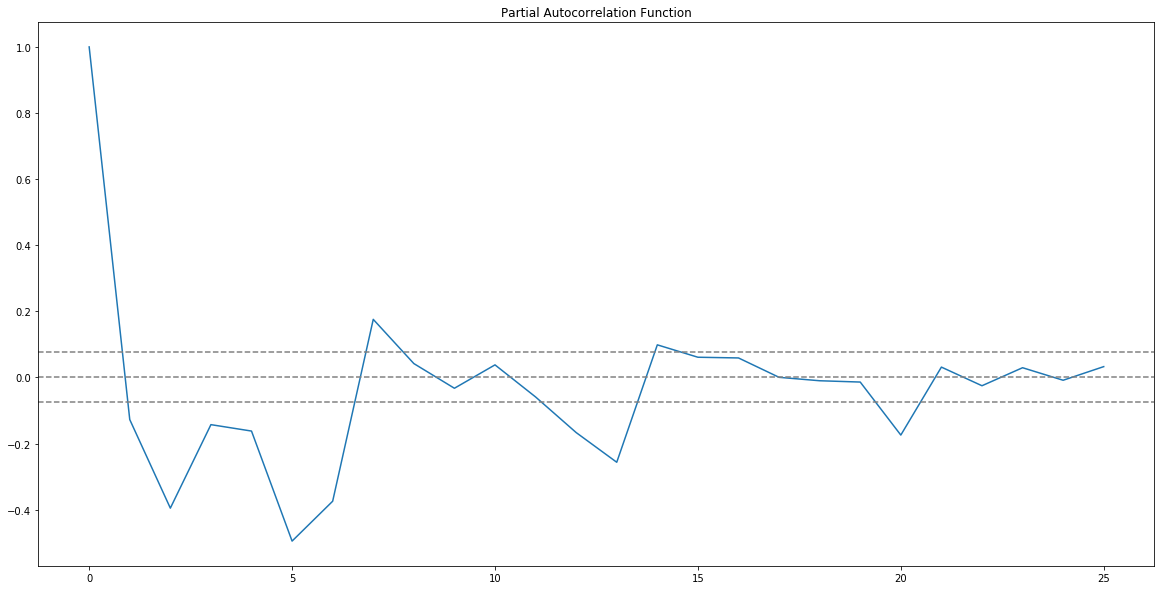

In [94]:
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.show()

plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()


- p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case p=1.

- q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case q=1.

Now we will make the ARIMA model as we have the p and q values. We will maker AR and MA models separately and then combine them together.

##### AR MODEL

Autoregression model specifies that the output variable depends linearly on its own previous values.

In [95]:
from statsmodels.tsa.arima_model import ARIMA

In [96]:
model = ARIMA(Train_log, order=(2,1,0)) #here the q value is zero since it is just de AR model.

In [97]:
results_AR = model.fit(disp=-1)

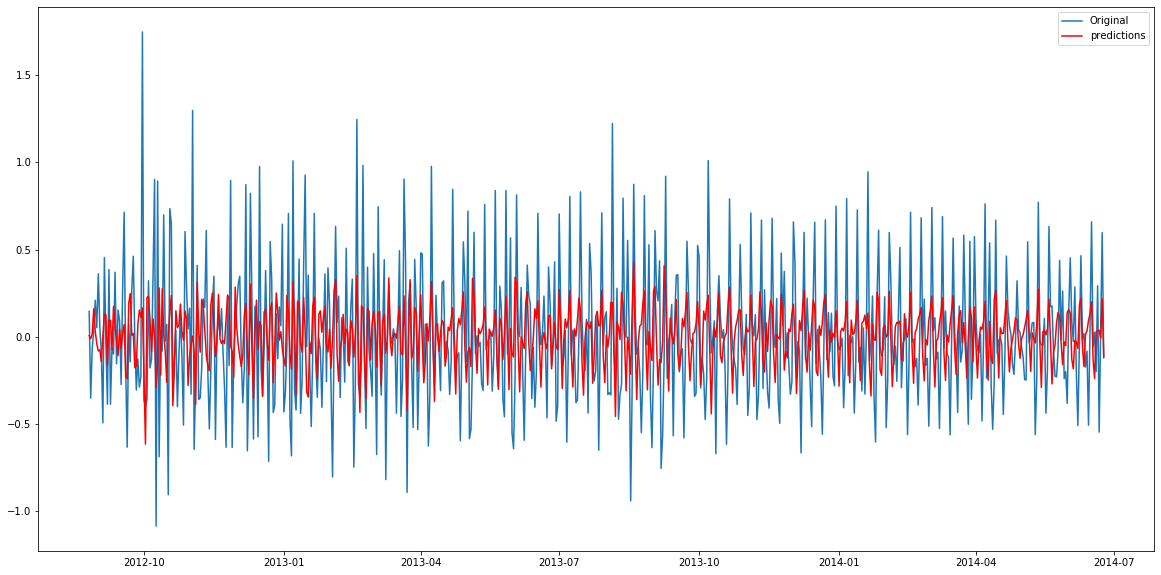

In [98]:
plt.plot(train_log_diff.dropna(), label='Original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

Lets plot the validation curve for AR model.

We have to change the scale of the model to the original scale.

First step would be to store the predicted results as a separate series and observe it.

In [99]:
AR_predict = results_AR.predict(start='2014-06-25', end='2014-09-25')

In [100]:
AR_predict = AR_predict.cumsum().shift().fillna(0)

In [101]:
AR_predict1 = pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index=valid.index)
AR_predict1 = AR_predict1.add(AR_predict, fill_value=0)

In [102]:
AR_predict = np.exp(AR_predict1)

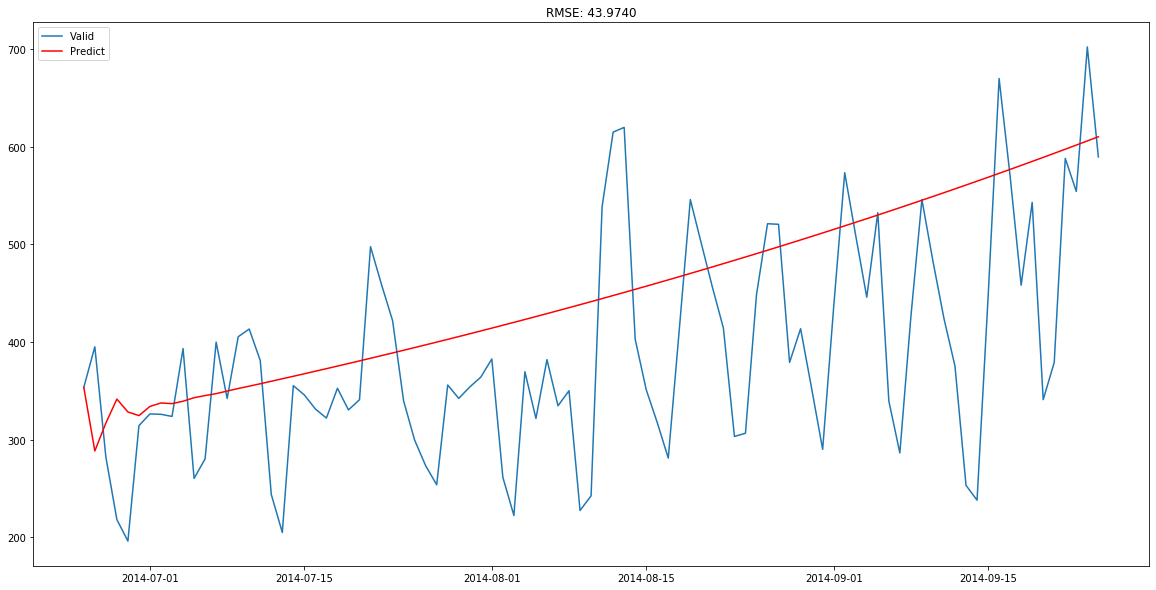

In [103]:
plt.plot(valid['Count'], label='Valid')
plt.plot(AR_predict, color='red', label='Predict')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0]))
plt.show()

Here the red line shows the prediction for the validation set. 

Let's build now the MA model.

##### MA MODEL

MOVING AVERAGE model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

In [104]:
model = ARIMA(Train_log, order=(0,1,2)) #Here the p value is zero since it is just the MA model.

In [105]:
results_MA = model.fit(disp=-1)

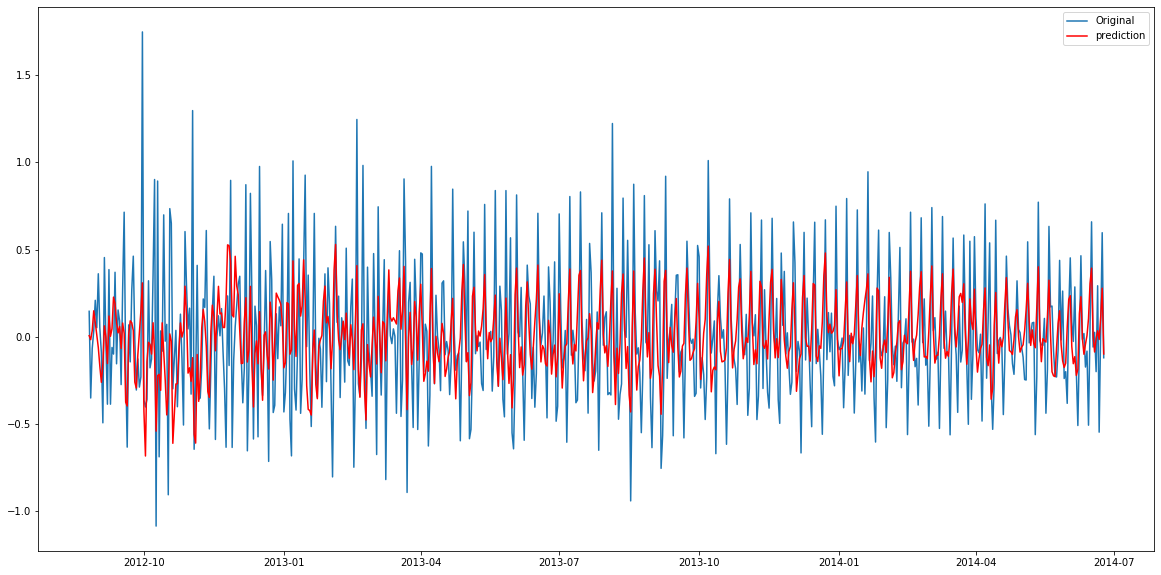

In [106]:
plt.plot(train_log_diff.dropna(), label='Original')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()

In [107]:
MA_predict = results_MA.predict(start='2014-06-25', end='2014-09-25')

In [108]:
MA_predict = MA_predict.cumsum().shift().fillna(0)

In [109]:
MA_predict1 = pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index=valid.index)
MA_predict1 = MA_predict1.add(MA_predict, fill_value=0)

In [110]:
MA_predict = np.exp(MA_predict1)

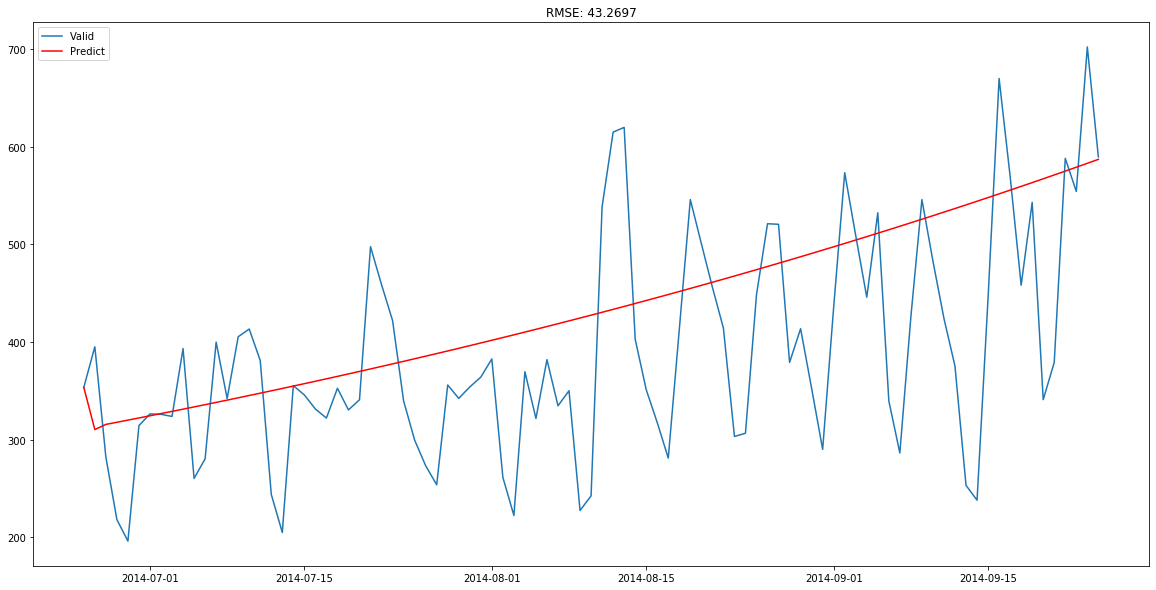

In [111]:
plt.plot(valid['Count'], label='Valid')
plt.plot(MA_predict, color='red', label='Predict')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]))
plt.show()

##### COMBINE MODELS

Now, let's combine both models.

In [112]:
model = ARIMA(Train_log, order=(2,1,2))

In [113]:
results_ARIMA = model.fit(disp=-1)

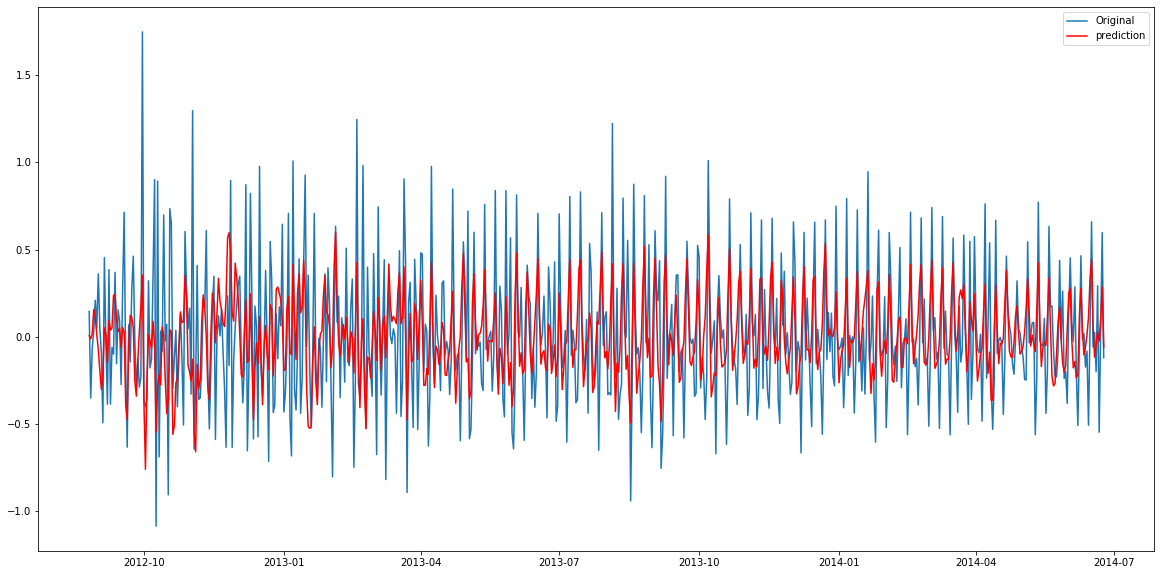

In [114]:
plt.plot(train_log_diff.dropna(), label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()

Let's define a function that can be used to change the scale of the model to the original scale

In [115]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff = predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index=given_set.index)
    predict_log = predict_base.add(predict_diff, fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label='Given Set')
    plt.plot(predict, color='red', label='Predict')
    plt.legend(loc='best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [116]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label='Given Set')
    plt.plot(predict, color='red', label='Predict')
    plt.legend(loc='best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()
    

Let's predict the values for Validation Set.

In [117]:
ARIMA_predict_diff = results_ARIMA.predict(start='2014-06-25', end='2014-09-25')

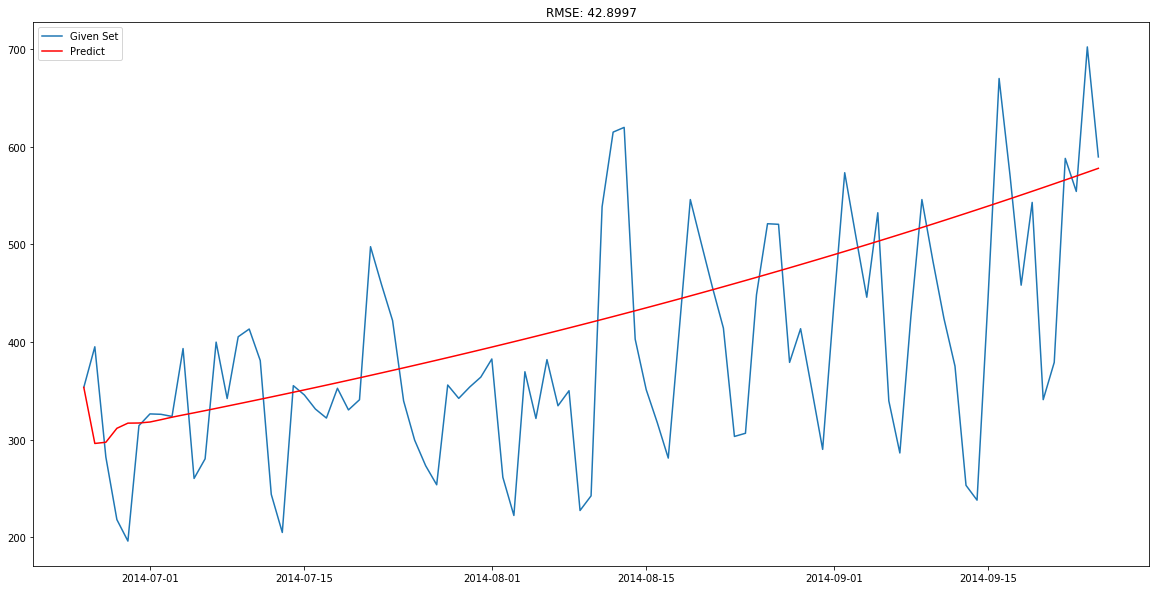

In [118]:
check_prediction_diff(ARIMA_predict_diff, valid)

## SARIMAX model on daily time series

SARIMAX model takes into account the seasonality of the Time Series. So we will build SARIMAX model on the time series.

In [119]:
import statsmodels.api as sm

In [120]:
y_hat_avg = valid.copy()

In [121]:
fit1 = sm.tsa.statespace.SARIMAX(Train['Count'], order=(2,1,4), seasonal_order=(0,1,1,7)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [122]:
y_hat_avg['SARIMA'] = fit1.predict(start='2014-06-25', end='2014-09-25', dynamic=True)

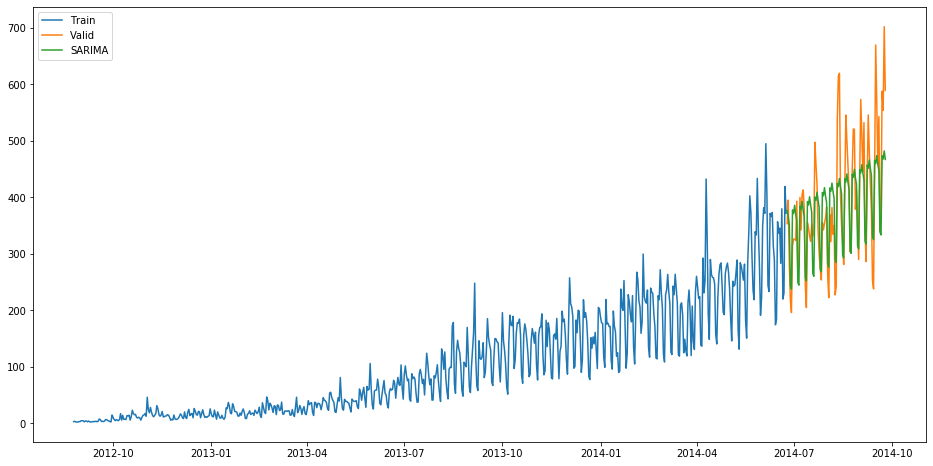

In [123]:
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

- Order in the above model represents the order of the:
    - autoregressive model (number of time lags)
    - the degree of differencing (number of times the data have had past values subtracted)
    - the order of moving average model.
    
    
- Seasonal order represents the order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity.


- In our case the periodicity is 7, since it is daily time series and will repeat after every 7 days.
    

Let's check the RMSE value for the validation set.

In [124]:
rmse = sqrt(mean_squared_error(valid['Count'], y_hat_avg['SARIMA']))
rmse

69.67242279085332

Now we will forecast the time series for Test Data which starts from 2014-09-26 and ends at 2015-04-26

In [125]:
predict = fit1.predict(start='2014-09-26', end='2015-04-26', dynamic=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


Note that these are the daily predictions and we need hourly predictions. So, we will distribute this daily prediction into hourly counts. To do so, we will take the ratio of hourly distribution of passengers count from train data and then we will distribute the predictions in the same ratio.  

In [126]:
test['prediction'] = predict

In [127]:
# Merge Test and test_original on day, month, year.
merge=pd.merge(test, test_original, on=('day', 'month', 'year'), how='left')
merge['hour']=merge['hour_y']
merge=merge.drop(['year', 'month','Datetime','hour_x','hour_y'], axis=1)

In [128]:
# Predicting by merging Merge and Temp2

prediction=pd.merge(merge, temp2, on='hour', how='left')

In [129]:
# Converting the ratio to the original scale 

prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [130]:
# Let's drop all other features from the submission file and keep ID and Count only.

prediction['ID']=prediction['ID_y']
submission=prediction.drop(['ID_x', 'day', 'ID_y', 'prediction', 'hour', 'ratio'], axis=1)

In [131]:
# Converting the final submission to csv format

pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')

This method gave us the least rmse score. The RMSE score on the leaderboard was 219.095